Plotting tools based on results obtained from ML_experiments and NN_experiments

In [1]:
import pandas as pd
import numpy as np
from tbparse import SummaryReader
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import clear_output

In [157]:
ml_data = pd.read_csv('./classic_ML_all_result.csv', index_col=0)
nn_data = pd.read_csv('./NN_all_results_new.csv', index_col=0)
nn2 = pd.read_csv('./NN_results_32Hz_all.csv', index_col=0)

In [158]:
ml_data = ml_data.drop((ml_data[ml_data.discretization==250]).index)
# ml_data = ml_data.drop((ml_data[ml_data.sampling=='over']).index)
ml_data = ml_data.drop((ml_data[ml_data.model=='CatBoost_untuned']).index)
# ml_data = ml_data.drop(columns='sampling')

In [159]:
nn_data = nn_data.rename({'average':'epochs'}, axis=1)
nn_data['model'] = 'CNN'
nn_data.loc[nn_data.discretization==35, 'discretization'] = 32

In [153]:
# ml_data = ml_data[ml_data.discretization==32]
nn2 = nn2.rename({'average':'epochs'}, axis=1)

In [160]:
data = pd.concat([ml_data, nn_data])
data.reset_index(inplace=True, drop=True)

In [164]:
data.sort_values('bci_accuracy', ascending=False).head(10)

,accuracy,balanced_accuracy,f1,precision,recall,fbeta,model,sampling,tn,fp,fn,tp,itr,bci_accuracy,channels,discretization,epochs
989,0.919600,0.787490,0.640000,0.615400,0.666700,0.625000,CNN,NaN,95,5,4,8,12.886964,0.8,4,60,8
319,0.919643,0.771667,0.608696,0.636364,0.583333,0.625000,LGB,over,96,4,5,7,12.886964,0.8,16,32,8
913,0.955357,0.828333,0.761905,0.888889,0.666667,0.833333,SVM,over,99,1,4,8,12.886964,0.8,8,120,8
316,0.919643,0.771667,0.608696,0.636364,0.583333,0.625000,XGB_untuned,over,96,4,5,7,12.886964,0.8,16,32,8
717,0.946429,0.750000,0.666667,1.000000,0.500000,0.833333,XGB,real,100,0,6,6,12.886964,0.8,4,120,8
638,0.910714,0.803333,0.615385,0.571429,0.666667,0.588235,LGB_untuned,over,94,6,4,8,7.932338,0.6,16,60,8
118,0.937500,0.745000,0.631579,0.857143,0.500000,0.750000,LGB_untuned,real,99,1,6,6,7.932338,0.6,8,32,8
903,0.906667,0.825000,0.631579,0.562500,0.720000,0.588235,LGB,over,186,14,7,18,15.864675,0.6,8,120,4
225,0.959732,0.922462,0.823529,0.777778,0.875000,0.795455,SVM,over,129,4,2,14,10.576450,0.6,4,32,6
974,0.955400,0.874514,0.800000,0.769200,0.833300,0.781200,CNN,NaN,97,3,2,10,7.932338,0.6,8,32,8


# CNN learning process plot

In [165]:
fname = 'Test_8ch_35Hz_8ep_100_learning'
log_dir = "D:/Study/MSUAI/lightning_logs/" + fname
reader = SummaryReader(log_dir)
df = reader.scalars
print(df)

     step         tag     value
0       5    accuracy  0.901786
1      11    accuracy  0.901786
2      17    accuracy  0.857143
3      23    accuracy  0.767857
4      29    accuracy  0.714286
..    ...         ...       ...
535   579  train_loss  0.002720
536   584  train_loss  0.003462
537   589  train_loss  0.003128
538   594  train_loss  0.004238
539   599  train_loss  0.005893

[540 rows x 3 columns]


In [166]:
df.tag.unique()

array(['accuracy', 'epoch', 'fbeta', 'train_loss'], dtype=object)

In [167]:
# Prepare for plotting
metric = df[df.tag=='fbeta']
epoch = df[df.tag=='epoch']
loss = df[df.tag=='train_loss']
for d in [metric, epoch, loss]:
    name = d.tag.unique().item()
    d.drop(['tag'], axis=1, inplace=True)
    d.rename(columns={'value':name}, inplace=True)

clear_output()

In [168]:
df2 = metric.merge(loss, on='step').merge(epoch, on='step')
df2 = df2.melt(id_vars=['step', 'epoch']).drop_duplicates()
df2.head()

,step,epoch,variable,value
0,29,4.0,fbeta,0.305556
2,59,9.0,fbeta,0.265957
4,89,14.0,fbeta,0.403226
6,119,19.0,fbeta,0.543478
8,149,24.0,fbeta,0.657895


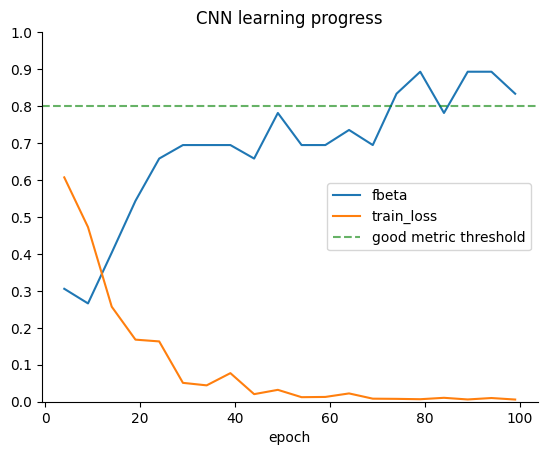

In [178]:
import seaborn as sns
fig, ax = plt.subplots(1)
sns.lineplot(df2, x='epoch', y='value', hue='variable', ax=ax)
ax.set(ylim=(0,1), yticks=np.arange(0,1.1,0.1), ylabel='')
ax.axhline(0.8, c='g', ls='--', alpha=0.6, label='good metric threshold')
ax.set_title('CNN learning progress')
# ax.axhline(0.5, c='r', ls='--', alpha=0.6, label='random level')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

# plt.savefig('CNN_PP.jpg', dpi=300)
plt.show()

# Plot results

In [50]:
melted = ml_data.melt(id_vars=['model', 'channels', 'discretization', 'epochs', 'sampling'], var_name='metric')
melted

,model,channels,discretization,epochs,sampling,metric,value
0,LDA,1,32,1,real,accuracy,0.887778
1,SVM,1,32,1,real,accuracy,0.773333
2,RF_untuned,1,32,1,real,accuracy,0.888889
3,RF,1,32,1,real,accuracy,0.888889
4,XGB_untuned,1,32,1,real,accuracy,0.881111
...,...,...,...,...,...,...,...
11515,RF,16,120,8,over,bci_accuracy,0.400000
11516,XGB_untuned,16,120,8,over,bci_accuracy,0.200000
11517,XGB,16,120,8,over,bci_accuracy,0.400000
11518,LGB_untuned,16,120,8,over,bci_accuracy,0.400000


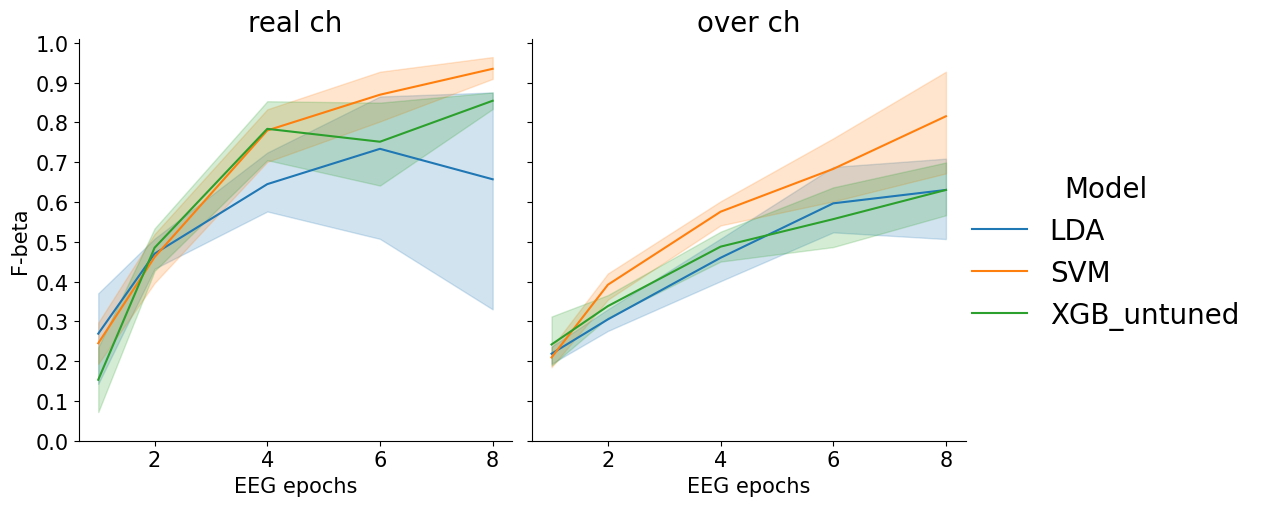

In [59]:
df = melted.query(" metric=='fbeta' & model.isin(['SVM', 'XGB_untuned','LDA']) & discretization==32 ") #& model.isin(['CNN', 'SVM', 'LDA', 'XGB_untuned'])
df = df.rename({'model':'Model'}, axis=1)
with plt.rc_context({'xtick.labelsize':15,
                     'ytick.labelsize':15,
                     'legend.fontsize':20,
                     'legend.title_fontsize':20}):
    g = sns.relplot(df, x='epochs', y='value', hue='Model', col='sampling', kind='line')
    # g.map(plt.axhline, y=0.5, c='r', ls='--', label='lower threshold', alpha=0.7)
    # g.map(plt.axhline, y=0.8, c='green', ls='--', label='good threshold', alpha=0.7)
    # g.set_titles('{col_name} Hz | {row_name}', size=20)
    g.set_titles('{col_name} ch', size=20)
    g.set_ylabels('F-beta', size=15)
    g.set_xlabels('EEG epochs', size=15)
    g.set(yticks=np.arange(0,1.1,0.1))
    # g.fig.tight_layout(pad=4)
    # g.legend.remove()
    # g.add_legend(fontsize=20)
    
    plt.show()
    # plt.savefig('result_CNN_discret.jpg', dpi=300)

Text(0.5, 1.0, 'All models performance at 32 Hz')

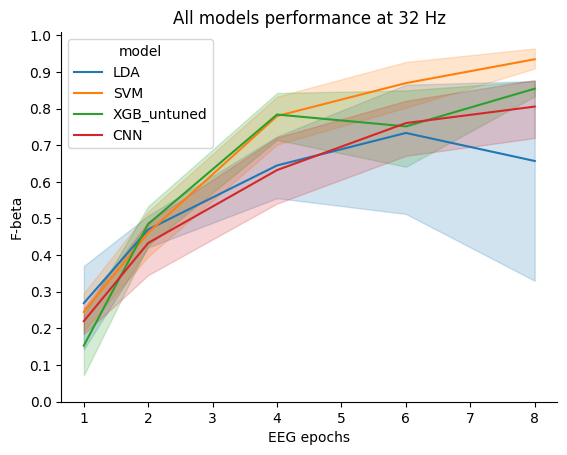

In [103]:
df = melted.query(" metric=='fbeta' & model.isin(['CNN', 'SVM', 'LDA', 'XGB_untuned'])")

sns.lineplot(df, x='epochs', y='value', hue='model')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(ylabel='F-beta', xlabel='EEG epochs', yticks=np.arange(0, 1.1, 0.1))
ax.set_title('All models performance at 32 Hz')
# plt.savefig('all_models.jpg', dpi=300)

In [94]:
nn_subj = pd.read_csv('./NN_results_32Hz_subjects.csv', index_col=0)
nn_subj = nn_subj.drop(columns=['discretization', 'average'])
nn_subj['model'] = 'CNN'
nn_subj['sampling'] = 'real'
ml_subj = pd.read_csv('./classic_ML_all_subjects.csv', index_col=0)
ml_subj = ml_subj[ml_subj.subject.isin(nn_subj.subject.unique())]

In [95]:
df = pd.concat([nn_subj, ml_subj])
df.head()

,subject,channels,accuracy,balanced_accuracy,f1,fbeta,precision,recall,bci_accuracy,itr,tp,tn,fp,fn,model,sampling
0,ak,8,0.964286,0.980769,0.800000,0.909091,1.000000,0.666667,0.4,4.015304,8,100,0,4,CNN,real
1,as,8,0.972727,0.944444,0.869565,0.892857,0.909091,0.833333,0.2,1.135865,10,97,1,2,CNN,real
2,az,8,0.936937,0.830848,0.720000,0.703125,0.692308,0.750000,0.2,1.135865,9,95,4,3,CNN,real
3,dad,8,0.963964,0.935148,0.818182,0.865385,0.900000,0.750000,0.2,1.135865,9,98,1,3,CNN,real
4,dkv,8,0.981982,0.990099,0.909091,0.961538,1.000000,0.833333,0.4,4.015304,10,99,0,2,CNN,real


In [96]:
df = df.melt(id_vars=['subject', 'channels', 'sampling','model'], var_name='metric')
df.head()

,subject,channels,sampling,model,metric,value
0,ak,8,real,CNN,accuracy,0.964286
1,as,8,real,CNN,accuracy,0.972727
2,az,8,real,CNN,accuracy,0.936937
3,dad,8,real,CNN,accuracy,0.963964
4,dkv,8,real,CNN,accuracy,0.981982


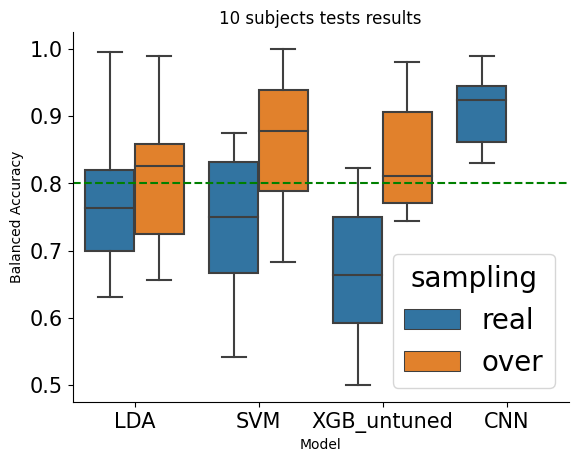

In [134]:

ax = sns.boxplot(df[df.metric=='balanced_accuracy'], x='model', y='value', hue='sampling', order=['LDA', 'SVM', 'XGB_untuned', 'CNN'])
ax.set_title('10 subjects tests results')
ax.set(xlabel='Model', ylabel='Balanced Accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axhline(0.8, c='g', ls='--')

# plt.savefig('10_subjects_ba.jpg', dpi=300)
plt.show()

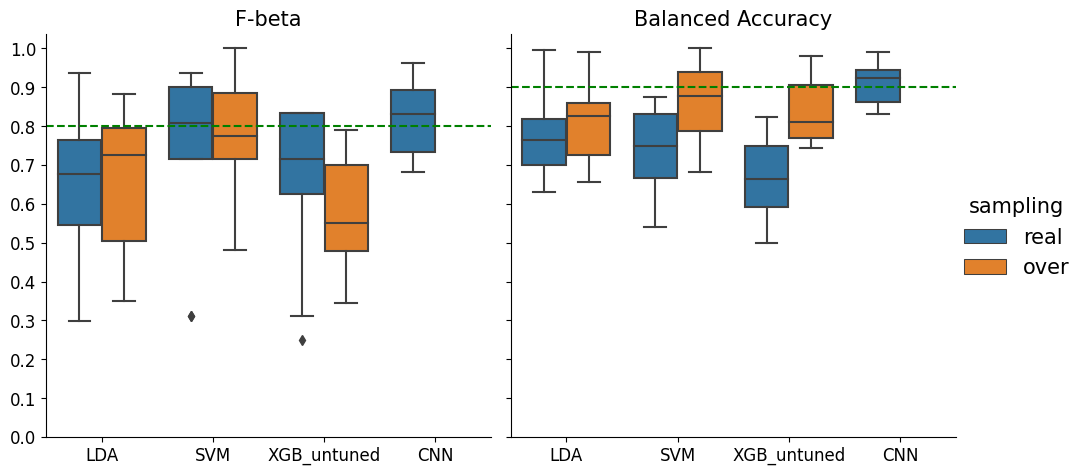

In [150]:
p = df.query(" metric.isin(['balanced_accuracy', 'fbeta']) ")
with plt.rc_context({'xtick.labelsize':12,
                     'ytick.labelsize':12,
                     'legend.fontsize':15,
                     'legend.title_fontsize':15}):
    g = sns.catplot(p, x='model', y='value', col='metric', hue='sampling', kind='box',
                order=['LDA', 'SVM', 'XGB_untuned', 'CNN'], col_order=['fbeta', 'balanced_accuracy'])
    # g.set_titles('{col_name}', size=20)
    g.set_ylabels('', size=15)
    g.set_xlabels('', size=15)
    g.set(yticks=np.arange(0,1.1,0.1))
    g.axes[0][0].set_title('F-beta', size=15)
    g.axes[0][0].axhline(0.8, c='g', ls='--')
    g.axes[0][1].set_title('Balanced Accuracy', size=15)
    g.axes[0][1].axhline(0.9, c='g', ls='--')
    
    # plt.savefig('10_subjects_fbeta_ba.jpg', dpi=300)
    plt.show()